In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from IPython.display import display, Markdown
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud


In [10]:
csv_path = 'dataset/descriptions'
csv_files = [os.path.join(csv_path, f) for f in os.listdir(csv_path) if f.endswith('.csv')]
dfs = [pd.read_csv(csv_file) for csv_file in csv_files]

combined_df = pd.concat(dfs, ignore_index=True)

**TOTAL # of Images** = 469

**TOTAL # of References** = 1,087

**MAX # of References to single image** = 7

**Mean # of References to single image** = 2.318

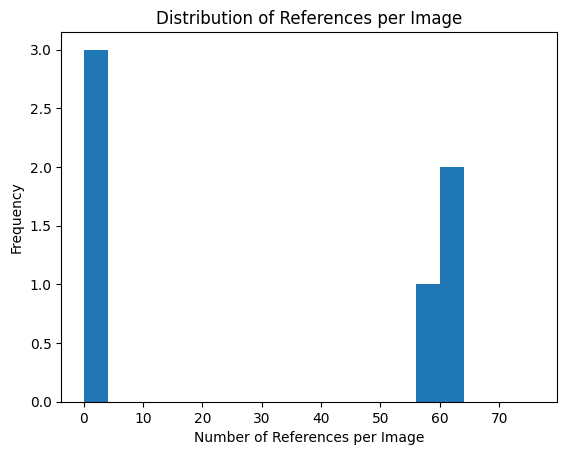

In [11]:
total_references = sum(len(eval(ref)) for ref in combined_df['Reference'])
max_references = max(len(eval(ref)) for ref in combined_df['Reference'])
mean_references = np.mean([len(eval(ref)) for ref in combined_df['Reference']])
n_images = len(combined_df)

display(Markdown(f"**TOTAL # of Images** = {n_images:,}"))
display(Markdown(f"**TOTAL # of References** = {total_references:,}"))
display(Markdown(f"**MAX # of References to single image** = {max_references:,}"))
display(Markdown(f"**Mean # of References to single image** = {mean_references:,.3f}"))


num_refs_per_image = [len(ref) for ref in combined_df['Reference']]
plt.hist(num_refs_per_image, bins=range(0, 80, 4))
plt.xlabel('Number of References per Image')
plt.ylabel('Frequency')
plt.title('Distribution of References per Image')
# Save the figure
plt.savefig('references_per_image_distribution.png', dpi=300)
plt.show()

**TOTAL # of Words** = 45,901

**TOTAL # Unique Words** = 2,232

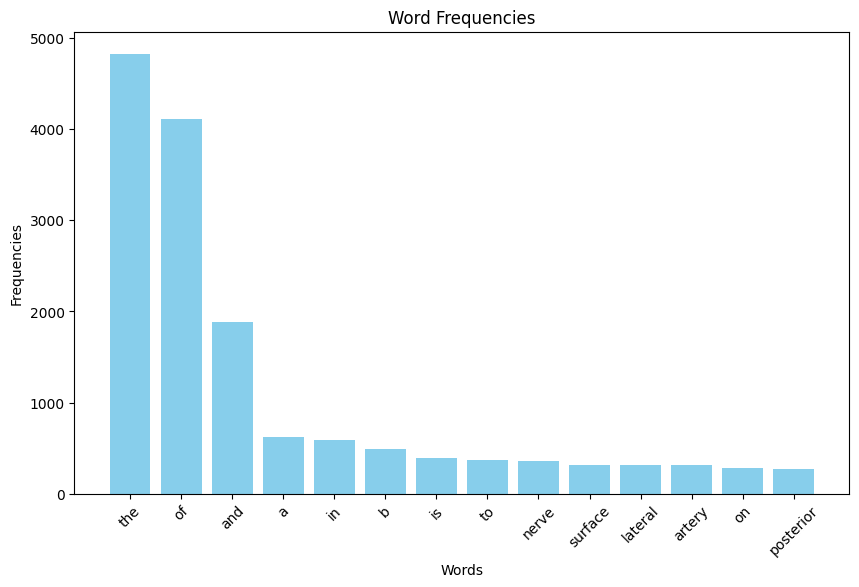

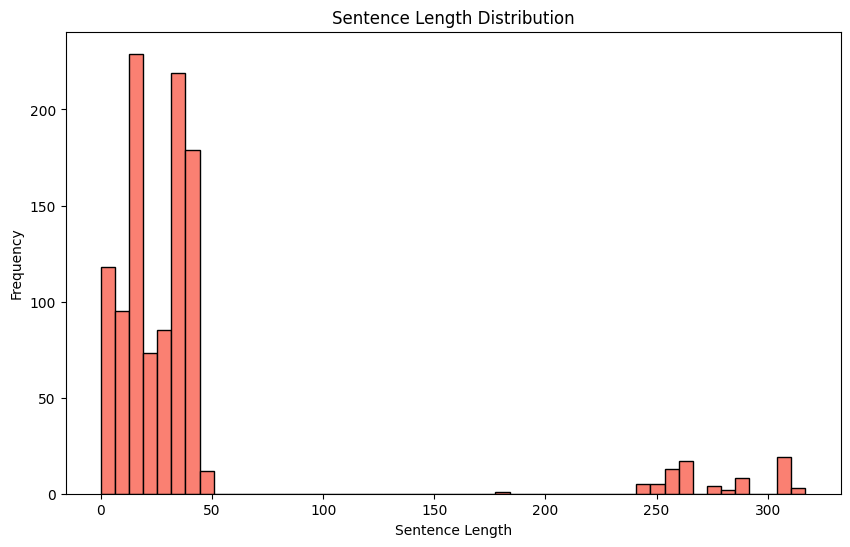

In [12]:
sentences = []
for ref_list in combined_df['Reference']:
    sentences.extend(eval(ref_list))
lowercase_sentences = [str(sentence).lower() for sentence in sentences]
tokenized_sentences = [word_tokenize(sentence) for sentence in lowercase_sentences]

words_only_sentences = [[word for word in sentence if word.isalnum()] for sentence in tokenized_sentences]
all_words = [word for sentence in words_only_sentences for word in sentence]
display(Markdown(f"**TOTAL # of Words** = {len(all_words):,}"))

word_freq = Counter(all_words)
display(Markdown(f"**TOTAL # Unique Words** = {len(word_freq):,}"))

mc_10 = word_freq.most_common(14)


words, frequencies = zip(*mc_10)

sentence_lengths = [len(str(sentence).split()) for sentence in sentences]

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(words, frequencies, color='skyblue')
ax1.set_xlabel('Words')
ax1.set_ylabel('Frequencies')
ax1.set_title('Word Frequencies')
ax1.tick_params(axis='x', rotation=45)

# Save the Word Frequencies plot
fig1.savefig('word_frequencies.png', dpi=300)

# Plot Sentence Length Distribution
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.hist(sentence_lengths, bins=50, color='salmon', edgecolor='black')
ax2.set_xlabel('Sentence Length')
ax2.set_ylabel('Frequency')
ax2.set_title('Sentence Length Distribution')

# Save the Sentence Length Distribution plot
fig2.savefig('sentence_length_distribution.png', dpi=300)

# Show the plots
plt.show()

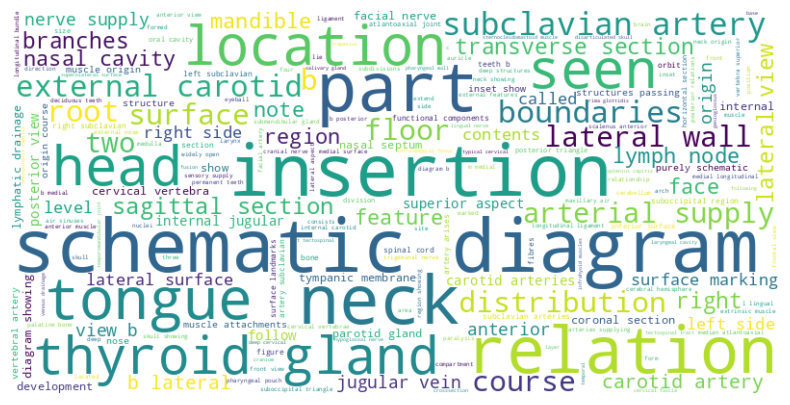

In [13]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('word_cloud.png')
plt.show()